# Polynomial Regression

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing Dataset

In [2]:
df = pd.read_csv('position_salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
X = df.iloc[:, 1:-1].values
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [4]:
y = df.iloc[:, -1].values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

## Data Visualization

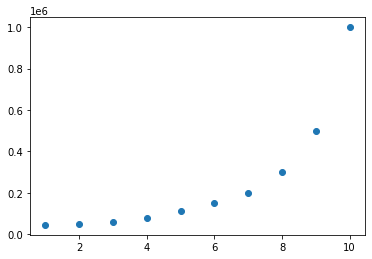

In [5]:
plt.scatter(X, y)
plt.show()

In [6]:
# no need to split train set test set

## Training Linear Regression Model (to compare)

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

## Training Polynomial Regression Model

In [9]:
# create matrix of powered features, x1, x1^2, ... x1^n

In [10]:
from sklearn.preprocessing import PolynomialFeatures

In [41]:
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X) # matrix of squared features

In [42]:
X_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [43]:
lin_reg_2 = LinearRegression() # multiple linear regression
lin_reg_2.fit(X_poly, y)

LinearRegression()

## Visualising Linear Regression

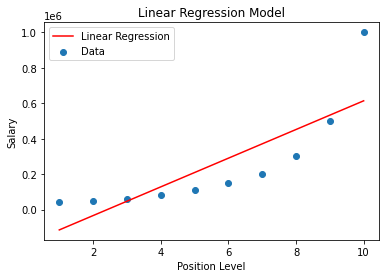

In [35]:
plt.scatter(X, y, label='Data')
plt.plot(X, lin_reg.predict(X), color='red', label='Linear Regression')

plt.title('Linear Regression Model')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()
plt.show()

## Visualising Polynomial Regression

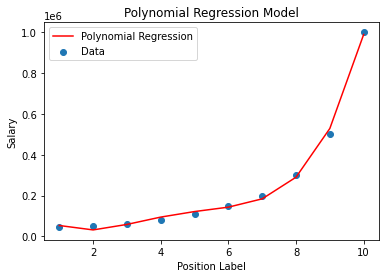

In [44]:
plt.scatter(X, y, label='Data')
plt.plot(X, lin_reg_2.predict(X_poly), color='red', label='Polynomial Regression')

plt.title('Polynomial Regression Model')
plt.xlabel('Position Label')
plt.ylabel('Salary')
plt.legend()
plt.show()

## Visualising Polynomial Regression (higher resolution and smoother curve)

In [53]:
X_grid = np.arange(min(X), max(X), 0.1) # step=0.1
X_grid

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4,
       7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7,
       8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

In [54]:
X_grid = X_grid.reshape(len(X_grid), 1)
# X_grid

In [55]:
X_grid_poly = poly_reg.fit_transform(X_grid)
# X_grid

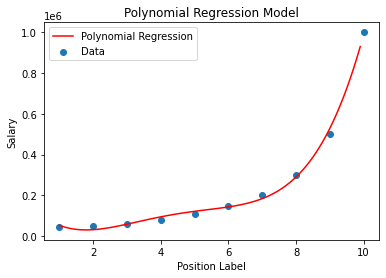

In [56]:
plt.scatter(X, y, label='Data')
plt.plot(X_grid, lin_reg_2.predict(X_grid_poly), color='red', label='Polynomial Regression')

plt.title('Polynomial Regression Model')
plt.xlabel('Position Label')
plt.ylabel('Salary')
plt.legend()
plt.show()

## Predicting with Linear Regression

In [62]:
X_new = np.array(6.5).reshape(1, 1) # == [[6.5]] // first bracket --> rows, second bracket --> columns
X_new

array([[6.5]])

In [69]:
y_pred = lin_reg.predict(X_new)
y_pred

array([330378.78787879])

## Predicting with Polynomial Regression

In [65]:
X_new_poly = poly_reg.fit_transform(X_new)
X_new_poly

array([[1.0000000e+00, 6.5000000e+00, 4.2250000e+01, 2.7462500e+02,
        1.7850625e+03]])

In [70]:
y_pred_2 = lin_reg_2.predict(X_new_poly)
y_pred_2

array([158862.45265155])